In [ ]:
# ------------------------------------------------------------
# Practical Assignment 2 - Naive Bayes Model using Python
# Datasets: Iris (GaussianNB) and SMS Spam (MultinomialNB)
# ------------------------------------------------------------

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# ------------------------------------------------------------
# PART 1: Gaussian Naive Bayes on Iris Dataset
# ------------------------------------------------------------
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42)


In [ ]:
# Train model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict
y_pred = gnb.predict(X_test)

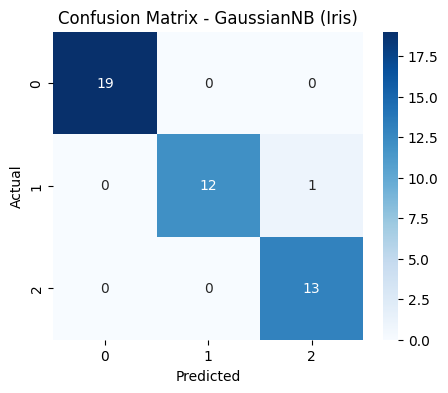

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - GaussianNB (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


In [ ]:
# Specificity Calculation
tn = np.diag(cm)
fp = cm.sum(axis=0) - tn
fn = cm.sum(axis=1) - tn
tp = tn
specificity = np.mean(tn / (tn + fp))

In [ ]:
print("GaussianNB (Iris) Metrics:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"Specificity  : {specificity:.4f}")

GaussianNB (Iris) Metrics:
Accuracy     : 0.9778
Precision    : 0.9762
Recall       : 0.9744
F1-Score     : 0.9743
Specificity  : 0.9762


In [ ]:
# ------------------------------------------------------------
# PART 2: Multinomial Naive Bayes on SMS Spam Dataset
# ------------------------------------------------------------


In [ ]:
# Load Dataset (UCI SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
sms = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
print("\nDataset sample:")
print(sms.head())


Dataset sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Encode Labels
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    sms['message'], sms['label_num'], test_size=0.2, random_state=42)

In [ ]:
# Convert text to bag-of-words
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train model
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Predict
y_pred2 = mnb.predict(X_test_vec)

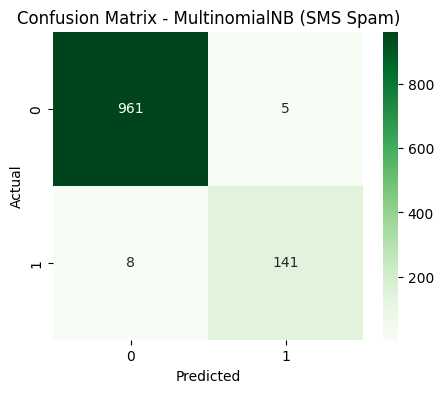

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix - MultinomialNB (SMS Spam)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Evaluation Metrics
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
tn2, fp2, fn2, tp2 = cm2.ravel()
specificity2 = tn2 / (tn2 + fp2)

In [ ]:
print("MultinomialNB (SMS Spam) Metrics:")
print(f"Accuracy     : {acc2:.4f}")
print(f"Precision    : {prec2:.4f}")
print(f"Recall       : {rec2:.4f}")
print(f"F1-Score     : {f1_2:.4f}")
print(f"Specificity  : {specificity2:.4f}")


MultinomialNB (SMS Spam) Metrics:
Accuracy     : 0.9883
Precision    : 0.9658
Recall       : 0.9463
F1-Score     : 0.9559
Specificity  : 0.9948


In [ ]:
# ------------------------------------------------------------
# PART 3: Analysis and Conclusion
# ------------------------------------------------------------


In [ ]:
print("\nAnalysis:")
print("GaussianNB (Iris): Model achieved high accuracy; clear class separation in continuous numeric data.")
print("MultinomialNB (SMS): Excellent recall and precision for spam detection; performs well on text counts.")

print("\nConclusion:")
print("Naive Bayes models provide fast, interpretable, and accurate classification results for both numeric and text datasets using simple probabilistic assumptions.")


Analysis:
GaussianNB (Iris): Model achieved high accuracy; clear class separation in continuous numeric data.
MultinomialNB (SMS): Excellent recall and precision for spam detection; performs well on text counts.

Conclusion:
Naive Bayes models provide fast, interpretable, and accurate classification results for both numeric and text datasets using simple probabilistic assumptions.
